# Loading the dataset

In [ ]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download a file based on its file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '13U0iA49UMjjSTPrVMkkamqtU9Q2qepUO' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweet_data.csv')  

# Installing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('dark')
from wordcloud import WordCloud
from textblob import TextBlob
import nltk

In [ ]:
df = pd.read_csv('tweet_data.csv', lineterminator='\n')
df = df.drop(['Unnamed: 0'],axis=1)

# Sentiment Analysis using TextBlob

In [ ]:
df['TBScore'] = df['Clean Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Set threshold to define neutral sentiment
neutral_thresh = 0.05

# Convert polarity score into sentiment categories
df['Sentiment'] = df['TBScore'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [ ]:
df.sample(10)

,Datetime,Text,Username,Like Count,Display Name,Clean Text,TBScore,Sentiment
280086,2020-12-09,"Today, Gov. Baker announced a detailed plan fo...",boston25,26,Boston 25 News,today gov baker announced a detailed plan for ...,0.400000,Positive
685513,2020-12-18,My husband got his #CovidVaccine yesterday and...,KashExit,0,KashExit,my husband got his covidvaccine yesterday and ...,0.500000,Positive
385739,2020-12-11,"""No Alcohol for Russians for Two Months after ...",AvinashKS14,0,Avinash K S🇮🇳,no alcohol for russians for two months after g...,0.000000,Neutral
941197,2020-12-26,Important thread on COVID and Israel:\nWhat th...,ASPphysician,38,Andrew Morris,important thread on covid and israel\nwhat the...,-0.015136,Neutral
232838,2020-12-08,Covid-19 vaccine: First person receives Pfizer...,RamZar1,0,RamZar,covid19 vaccine first person receives pfizer c...,0.250000,Positive
700848,2020-12-18,🔴 LIVE: VP to Get COVID Vaccine | The Election...,ElectionWiz,126,Election Wizard,red_circle live vp to get covid vaccine the e...,0.136364,Positive
1024210,2020-12-30,Got my COVID vaccine today 😉,NATTYiiicce,6,natashakola🇬🇾🇯🇲,got my covid vaccine today winking_face,0.000000,Neutral
324183,2020-12-10,Idea: Covid vaccine lottery\n- One entry for 1...,staringispolite,2,Jonathan Howard 👹⚔️,idea covid vaccine lottery\n one entry for 1st...,0.333333,Positive
815405,2020-12-21,if you never wondered what was in other vaccin...,l3xieparker,2,lexie,if you never wondered what was in other vaccin...,-0.125000,Negative
142952,2020-12-04,Plant-based vaccines and antibodies to combat ...,PsychiatryIntel,0,Psychiatry Intel,plantbased vaccines and antibodies to combat c...,0.000000,Neutral


**Polarity frequency**

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]), <a list of 8 Text major ticklabel objects>)

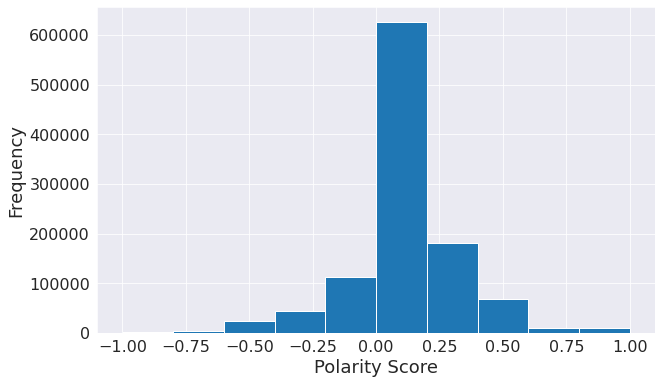

In [ ]:
fig = plt.figure(figsize=(10, 6))
df['TBScore'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

**Making wordclouds**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords_to_add = ['covid', 'via', 'v','a','c','c','i','n','e', 'people', 'get','getting','vaccination', 'amp', 'vaccine', 'covid19', 'covidvaccine']
stop_words.extend(new_stopwords_to_add)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


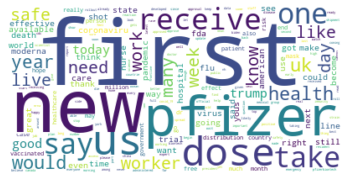

In [ ]:
pos_tweets=df[df["Sentiment"]=="Positive"]
txt=" ".join(tweet for tweet in pos_tweets["Clean Text"])
import re
line = re.sub('vaccine+', "", txt)

wordcloud = WordCloud(collocations = False,
                      background_color = 'white',
                      stopwords=stop_words).generate(line)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

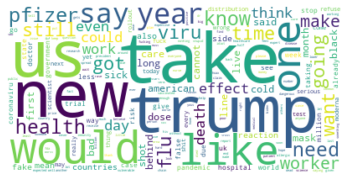

In [ ]:
neg_tweets=df[df["Sentiment"]=="Negative"]
txt=" ".join(tweet.lower() for tweet in neg_tweets["Clean Text"])
line = re.sub('vaccine+', "", txt)
wordcloud = WordCloud(collocations = False,background_color = 'white', stopwords=stop_words).generate(line)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Graphing the people's opinions**

In [ ]:
def get_value_counts(col_name):
    count = pd.DataFrame(df[col_name].value_counts())
    percentage = pd.DataFrame(df[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    return value_counts_df

In [ ]:
tb_sentiment_df = get_value_counts('Sentiment')
tb_sentiment_df

,sentiment,counts,percentage
0,Negative,160467,14.85
1,Neutral,442564,40.95
2,Positive,477722,44.20


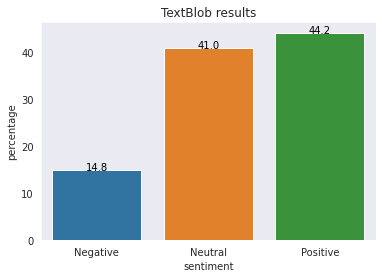

In [ ]:
ax = sns.barplot(x="sentiment", y="percentage", data=tb_sentiment_df)
ax.set_title('TextBlob results')

for index, row in tb_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

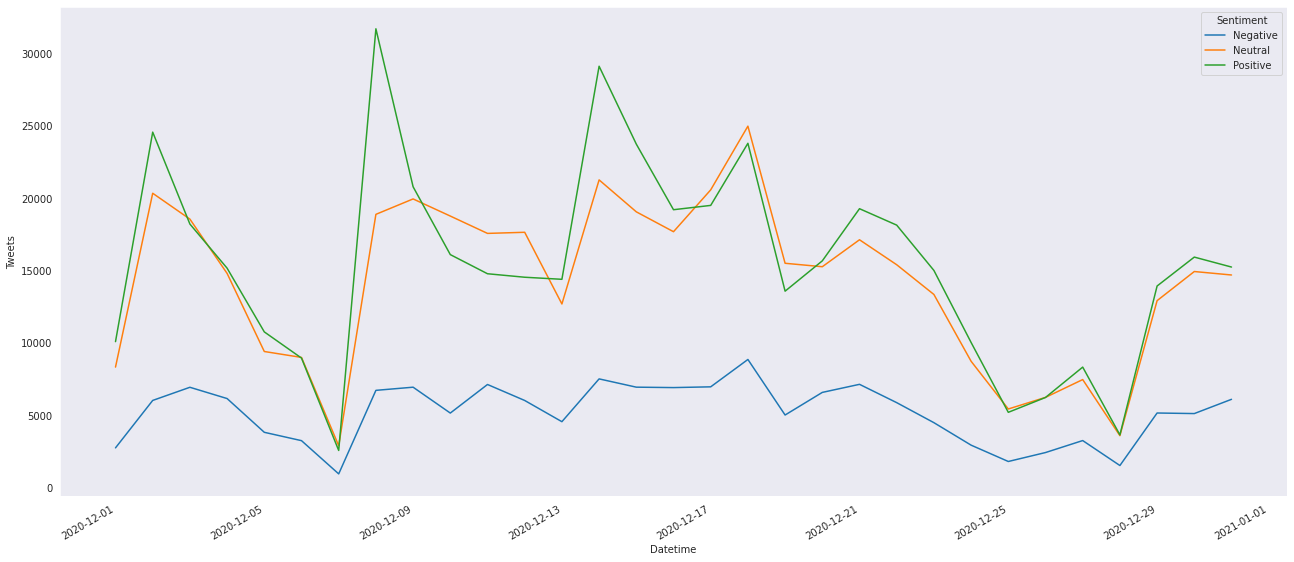

In [ ]:
# Plotting timeseries plot
df["Datetime"] = pd.to_datetime(df.Datetime) 
timeline = df.resample('D', on='Datetime')["Sentiment"].value_counts().unstack(1)
timeline.reset_index(inplace=True)
timeline = timeline.melt("Datetime", var_name='Sentiment',  value_name='Tweets')

plt.figure(figsize=(22,10))
ax = sns.lineplot(x="Datetime", y="Tweets", hue="Sentiment", data=timeline)
ax.figure.autofmt_xdate()

**Checking out top 10 negative tweets**

In [ ]:
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='TBScore', ascending=True)[['Text', 'TBScore', 'Username']].reset_index(drop=True).head(n=10)

,Text,TBScore,Username
0,"‘Truly, Truly Evil': Tucker Carlson Slammed For Sowing Doubt About COVID-19 Vaccines - https://t.co/UWrP1NCtTm https://t.co/HPhLb5PCqw",-1.0,southasiansnews
1,"Y'all gone feel real stupid when @rihanna drop a covid vaccine called ""R9"".",-1.0,PourJorden
2,"god watching everyone in this terrible, murderous administration get the covid vaccine before everyone else feels fucking terrible",-1.0,zoenone0none
3,#ruportmurdoch gets vaccine in #uk but was against #covid measures. His papers views are disgusting. @rupertmurdoch https://t.co/GjonHnGXe7,-1.0,xy798
4,SHOCKING! TRUTH COVID-19 VACCINE.SCIENTISTS WARN HUMANITY. MSM BANNED! https://t.co/iMOZGeCJ6S,-1.0,ian_
5,@marcorubio #FireLiddleMarco \n\nGov. Sununu Blasts Congress Members Who Got COVID-19 Vaccine: ‘Irresponsible and Insulting' https://t.co/DOKothnpIH,-1.0,sfk3226
6,@guypbenson What’s pathetic is you working for a network that just promoted people not taking the covid vaccine.,-1.0,xtreme_cent
7,#Tory MP says forcing people to get Covid-19 vaccine would set a 'terrible precedent' THIS IS TODAYS NEWS,-1.0,vijay72554845
8,@SenJoniErnst You’re disgusting you hypocrite #ernst #covid #vaccine #denier https://t.co/zv3qMmgB4o,-1.0,bigtrumploser
9,"@adrianbowyer The way to reduce the likelihood of mutations is to reduce the number of infections by rapidly distributing the vaccines, the worst way would be herd immunity, of yeah that was proposed by Covid Cummins.",-1.0,Capt_Kremin


**Checking out top 10 positive tweets**

In [ ]:
df.sort_values(by='TBScore', ascending=False)[['Text', 'TBScore', 'Username']].reset_index(drop=True).head(n=10)


,Text,TBScore,Username
0,@thehill There are still a lot of uncertainties about Vaccines. The best bet to fight against COVID is to maintain your immune system snd follow the safety protocols so you won’t get infected even without getting the vaccine.,1.0,bellasirenay
1,@Laird_Admiral @westernsussex @CNOEngland @WorthingJournal @Iloveworthing @CoolTownCrier Awesome Malcolm - see you on the #jabbingline 👍🏻#CovidVaccine,1.0,maggiedavies
2,"🤔Hmm. Sounds like the vaccine is the perfect solution to population control, eh Moderna's Bill Gates???\n\nABC Fertility Report: ‘Men May Want to Consider Freezing Sperm’ Before COVID Vaccine https://t.co/k5zjaF1WMa via @RaheemKassam",1.0,egatimra3
3,"The best! \nStella Parton, singer and sister of Dolly, lashes out at politicians in viral tweet over COVID-19 vaccine rollout https://t.co/mUJqNLn5YU",1.0,415holgate
4,Checkout @DanLarremore in the @DenverChannel on which COVID vaccine distribution strategies work best:\n\nhttps://t.co/LR7aowwk9d,1.0,TheRhoten
5,"Dr. Anthony Fauci has received the Moderna COVID-19 vaccine, 'the best hope against the pandemic' https://t.co/pjHzi83wKL",1.0,USATODAY
6,"@g1 the president of ur country also trivializes science and says“I'm not going to get this vaccine bcs I got the best vaccine,the 'virus' without side effects” #covid +",1.0,MariaSilviaPP_
7,Today has turned out to being probably the best day of 2020! 1) Biden excepts the Presidential nomination &amp; is addressing the people in 30 minutes on tv.\n2) Barr has resigned. 3) COVID-19 vaccine has started to be given!\n#Biden2020,1.0,Momma_Carmen
8,"Excellent thread, explaining Covid vaccine virology with lots of swearing. https://t.co/hP9w1hsVGB",1.0,knotgirl1
9,Awesome poster by @sairamaliha #CovidVaccine https://t.co/aaLK9T210c,1.0,christinakouts3
